In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix , roc_auc_score , roc_curve

In [ ]:
df = pd.read_csv('beerquality_red.csv')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [ ]:
print(df.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [ ]:
df.duplicated().sum()

np.int64(240)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
correlation_matrix = df.corr()
correlation_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


In [ ]:
df['quality'].value_counts()

,count
quality,
5,577
6,535
7,167
4,53
8,17
3,10


In [ ]:
set(df['quality'])

{3, 4, 5, 6, 7, 8}

In [ ]:
x= df.drop(columns='quality')
y= df.quality

In [ ]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
y

,quality
0,5
1,5
2,5
3,6
5,5
...,...
1593,6
1594,5
1595,6
1597,5


In [ ]:
x_train , x_test, y_train,y_test = train_test_split(x,y,test_size = .25,random_state = 30)

In [ ]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
215,7.0,0.490,0.49,5.6,0.060,26.0,121.0,0.99740,3.34,0.76,10.5
178,7.0,0.805,0.00,2.5,0.068,7.0,20.0,0.99690,3.48,0.56,9.6
160,7.6,0.950,0.03,2.0,0.090,7.0,20.0,0.99590,3.20,0.56,9.6
96,6.8,0.775,0.00,3.0,0.102,8.0,23.0,0.99650,3.45,0.56,10.7
1408,8.1,0.290,0.36,2.2,0.048,35.0,53.0,0.99500,3.27,1.01,12.4
...,...,...,...,...,...,...,...,...,...,...,...
1080,10.3,0.270,0.56,1.4,0.047,3.0,8.0,0.99471,3.16,0.51,11.8
1373,7.7,0.750,0.27,3.8,0.110,34.0,89.0,0.99664,3.24,0.45,9.3
577,8.8,0.440,0.49,2.8,0.083,18.0,111.0,0.99820,3.30,0.60,9.5
1107,9.1,0.300,0.41,2.0,0.068,10.0,24.0,0.99523,3.27,0.85,11.7


In [ ]:
x_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
247,8.2,0.600,0.17,2.3,0.072,11.0,73.0,0.99630,3.20,0.45,9.3
497,7.2,0.340,0.32,2.5,0.090,43.0,113.0,0.99660,3.32,0.79,11.1
1032,8.1,0.820,0.00,4.1,0.095,5.0,14.0,0.99854,3.36,0.53,9.6
489,9.3,0.390,0.40,2.6,0.073,10.0,26.0,0.99840,3.34,0.75,10.2
77,6.8,0.785,0.00,2.4,0.104,14.0,30.0,0.99660,3.52,0.55,10.7
...,...,...,...,...,...,...,...,...,...,...,...
222,6.8,0.610,0.04,1.5,0.057,5.0,10.0,0.99525,3.42,0.60,9.5
1001,9.9,0.350,0.38,1.5,0.058,31.0,47.0,0.99676,3.26,0.82,10.6
735,7.7,0.965,0.10,2.1,0.112,11.0,22.0,0.99630,3.26,0.50,9.5
708,7.8,0.545,0.12,2.5,0.068,11.0,35.0,0.99600,3.34,0.61,11.6


In [ ]:
y_train

,quality
215,5
178,5
160,5
96,5
1408,7
...,...
1080,6
1373,5
577,5
1107,7


In [ ]:
y_test

,quality
247,5
497,5
1032,5
489,6
77,6
...,...
222,5
1001,7
735,5
708,6


In [ ]:
dt_model = DecisionTreeClassifier()

In [ ]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
import sklearn
import  matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline

[Text(0.4230769230769231, 0.9285714285714286, 'x[5] <= 8.5\ngini = 0.591\nsamples = 40\nvalue = [3, 23, 10, 4]'),
 Text(0.15384615384615385, 0.7857142857142857, 'x[0] <= 7.45\ngini = 0.571\nsamples = 7\nvalue = [2, 1, 4, 0]'),
 Text(0.28846153846153844, 0.8571428571428572, 'True  '),
 Text(0.07692307692307693, 0.6428571428571429, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0]'),
 Text(0.23076923076923078, 0.6428571428571429, 'x[1] <= 0.45\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4, 0]'),
 Text(0.15384615384615385, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]'),
 Text(0.3076923076923077, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4, 0]'),
 Text(0.6923076923076923, 0.7857142857142857, 'x[2] <= 0.42\ngini = 0.507\nsamples = 33\nvalue = [1, 22, 6, 4]'),
 Text(0.5576923076923077, 0.8571428571428572, '  False'),
 Text(0.5384615384615384, 0.6428571428571429, 'x[6] <= 22.0\ngini = 0.402\nsamples = 29\nvalue = [1, 22, 3, 3]'),
 Text(0.46153846153846156, 0.5, 'gini = 0.0\nsamples = 2\

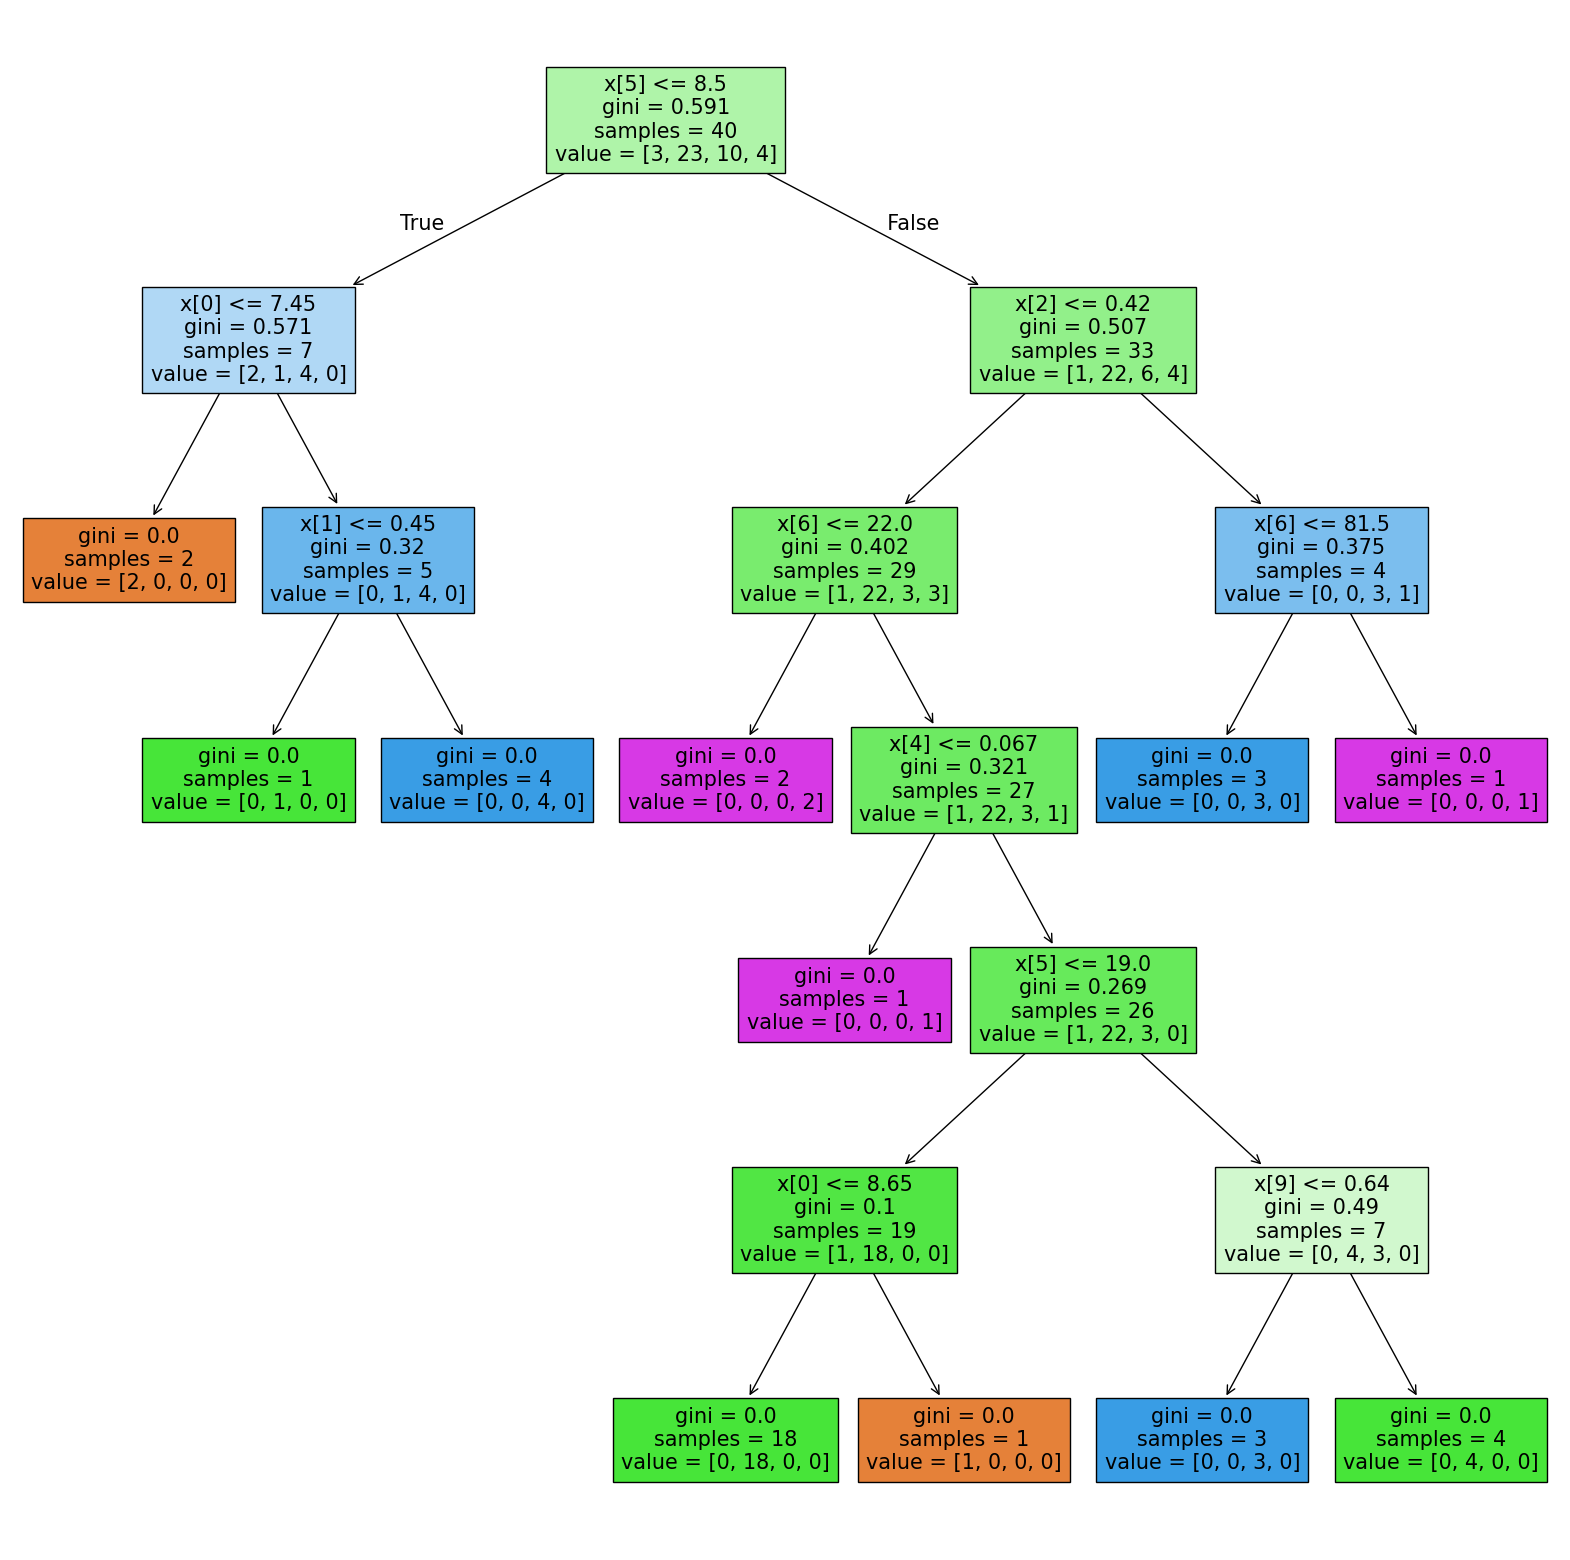

In [ ]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model,filled=True)

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df1 = df.head(40)

In [ ]:
x1= df1.drop(columns ='quality')

In [ ]:
y1= df1.quality

In [ ]:
dt_model1 = DecisionTreeClassifier()
dt_model1.fit(xi,y1)

DecisionTreeClassifier()

[Text(0.4583333333333333, 0.9285714285714286, 'x[5] <= 8.5\ngini = 0.591\nsamples = 40\nvalue = [3, 23, 10, 4]'),
 Text(0.25, 0.7857142857142857, 'x[6] <= 18.5\ngini = 0.571\nsamples = 7\nvalue = [2, 1, 4, 0]'),
 Text(0.35416666666666663, 0.8571428571428572, 'True  '),
 Text(0.16666666666666666, 0.6428571428571429, 'x[3] <= 1.9\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4, 0]'),
 Text(0.08333333333333333, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4, 0]'),
 Text(0.3333333333333333, 0.6428571428571429, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0]'),
 Text(0.6666666666666666, 0.7857142857142857, 'x[2] <= 0.42\ngini = 0.507\nsamples = 33\nvalue = [1, 22, 6, 4]'),
 Text(0.5625, 0.8571428571428572, '  False'),
 Text(0.5, 0.6428571428571429, 'x[6] <= 22.0\ngini = 0.402\nsamples = 29\nvalue = [1, 22, 3, 3]'),
 Text(0.4166666666666667, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2]'),
 Text(0.5833333333333334, 0.5, 'x[

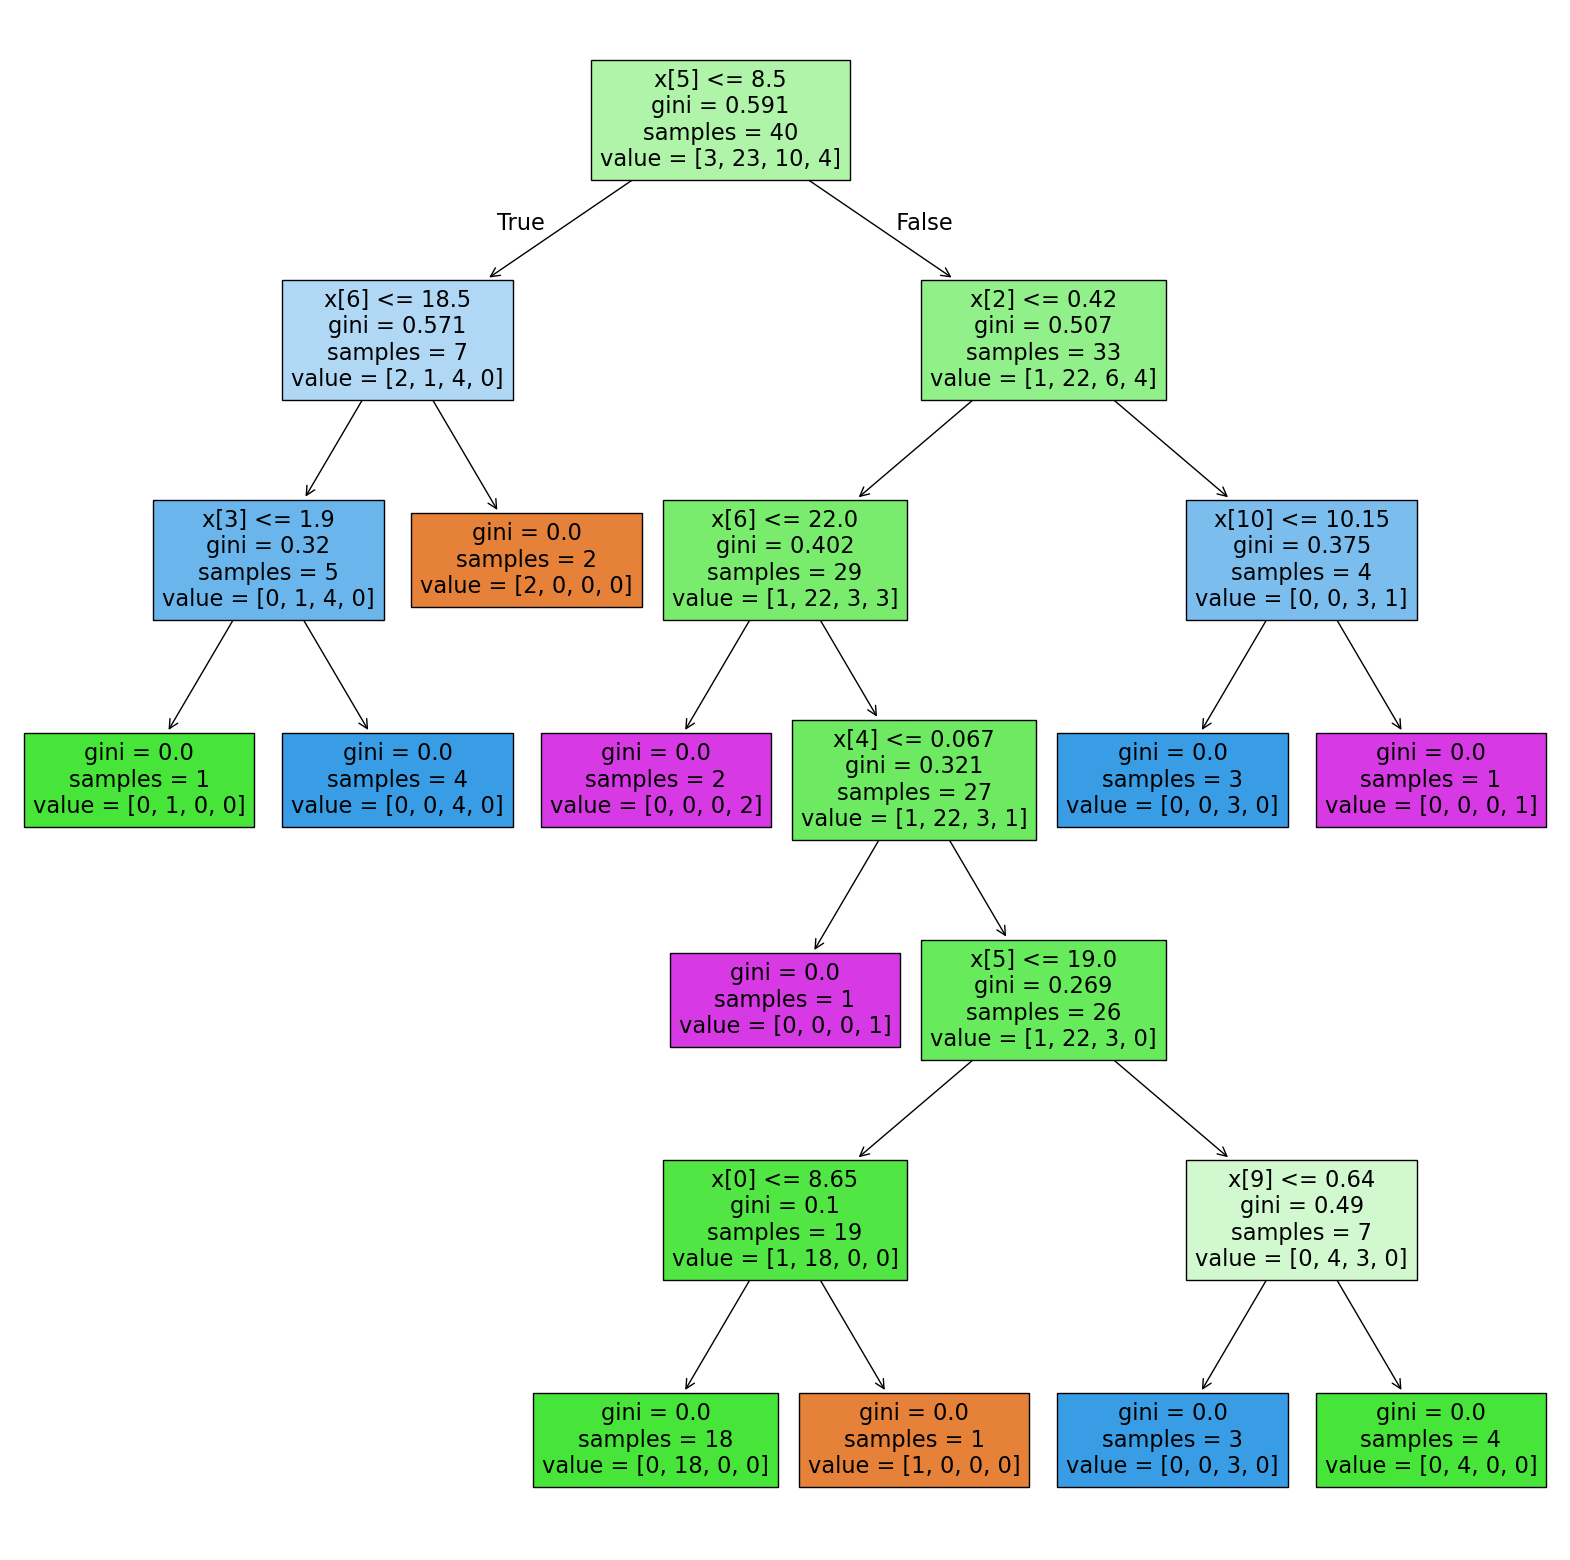

In [ ]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model1,filled=True)

In [ ]:
dt_model1.predict(x1)

array([5, 5, 5, 6, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 7, 5, 4, 6, 6, 5, 5, 5,
       6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 7, 4, 5, 4, 6, 5])

In [ ]:
dt_model.score(x-train,y_train)

0.3336604514229637

In [ ]:
dt_model.score(x_test,y_test)

0.3176470588235294

In [ ]:
path = dt_model.cost_complexity_pruning_path(x_train,y_train)
ccp_alpha = path.ccp_alphas

In [ ]:
path

{'ccp_alphas': array([0.        , 0.00083415, 0.00084116, 0.00087231, 0.00088322,
        0.00088322, 0.00089214, 0.00089724, 0.00089957, 0.00090587,
        0.00090587, 0.00091593, 0.00093462, 0.00093869, 0.00094046,
        0.00094361, 0.00094864, 0.00098135, 0.00098135, 0.00098135,
        0.00098135, 0.00098135, 0.00098135, 0.00098135, 0.00098135,
        0.00098135, 0.00098135, 0.00098135, 0.00098135, 0.00098135,
        0.00098135, 0.00098135, 0.00098135, 0.00098135, 0.00098135,
        0.00098135, 0.00098135, 0.00098135, 0.00115749, 0.00115978,
        0.00122669, 0.00127576, 0.00130847, 0.00130847, 0.00130847,
        0.00130847, 0.00130847, 0.00130847, 0.00130847, 0.00130847,
        0.00130847, 0.00130847, 0.00130847, 0.00130847, 0.00133573,
        0.00134586, 0.0013588 , 0.0013957 , 0.00147203, 0.00147203,
        0.00147203, 0.00147203, 0.00147203, 0.00147203, 0.00147203,
        0.00147203, 0.00147203, 0.00147203, 0.00147203, 0.00147203,
        0.00147203, 0.00147203, 0.

In [ ]:
dt_model2 =[]
for ccp in ccp_alpha:
    dt_m = DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(x_train,y_train)
    dt_model2.append(dt_m)

In [ ]:
dt_model2

[DecisionTreeClassifier(ccp_alpha=np.float64(0.0)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0008341511285574091)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0008411608019066314)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0008723149056809508)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0008832188420019629)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0008832188420019629)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0008921402444464271)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0008972381887004066)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0008995747464834806)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0009058654789763716)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0009058654789763716)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0009159306509649986)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0009346231132295904)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0009386866919827625)),
 DecisionTreeClassifier(ccp_alpha=np.f

In [ ]:
dt_model2 = []
score = []
for i in ccp_alpha:
    dt_m = DecisionTreeClassifier(ccp_alpha=i)
    dt_m.fit(x_train,y_train)
    dt_model2.append(dt_m)
    score.append(dt_m.score(x_test,y_test))

Text(0, 0.5, 'score')

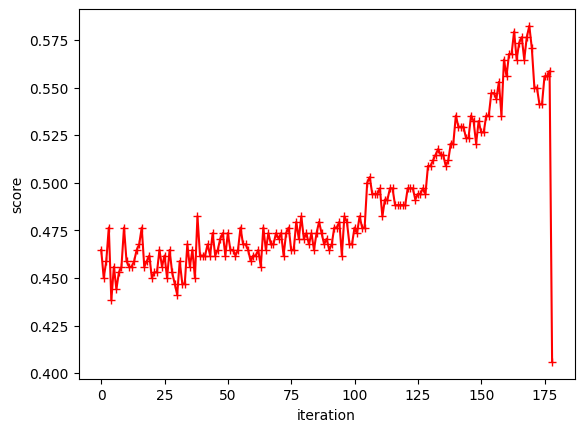

In [ ]:
plt.plot(score, 'r-+')
plt.xlabel('iteration')
plt.ylabel('score')

In [ ]:
dt_model2

[DecisionTreeClassifier(ccp_alpha=np.float64(0.0)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0008341511285574091)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0008411608019066314)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0008723149056809508)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0008832188420019629)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0008832188420019629)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0008921402444464271)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0008972381887004066)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0008995747464834806)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0009058654789763716)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0009058654789763716)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0009159306509649986)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0009346231132295904)),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0009386866919827625)),
 DecisionTreeClassifier(ccp_alpha=np.f

In [ ]:
train_score = [i.score(x_train,y_train) for i in dt_model2]

In [ ]:
test_score = [i.score(x_test ,y_test) for i in dt_model2]

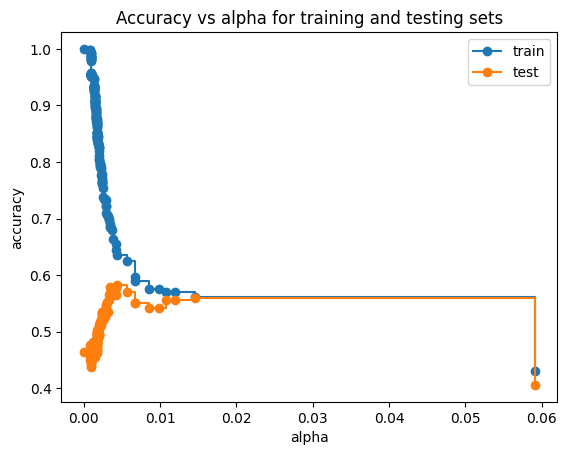

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alpha, train_score, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alpha, test_score, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
dt_model_ccp = DecisionTreeClassifier(random_state=0 , ccp_alpha=.009)
dt_model_ccp.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.009, random_state=0)

[Text(0.5, 0.875, 'x[10] <= 10.25\ngini = 0.646\nsamples = 1019\nvalue = [8.0, 40.0, 439.0, 398.0, 123.0, 11.0]'),
 Text(0.3, 0.625, 'x[6] <= 91.5\ngini = 0.529\nsamples = 547\nvalue = [6, 22, 337, 163, 17, 2]'),
 Text(0.4, 0.75, 'True  '),
 Text(0.2, 0.375, 'x[1] <= 0.548\ngini = 0.57\nsamples = 453\nvalue = [6.0, 21.0, 252.0, 155.0, 17.0, 2.0]'),
 Text(0.1, 0.125, 'gini = 0.588\nsamples = 205\nvalue = [1, 5, 90, 95, 12, 2]'),
 Text(0.3, 0.125, 'gini = 0.51\nsamples = 248\nvalue = [5, 16, 162, 60, 5, 0]'),
 Text(0.4, 0.375, 'gini = 0.175\nsamples = 94\nvalue = [0, 1, 85, 8, 0, 0]'),
 Text(0.7, 0.625, 'x[1] <= 0.335\ngini = 0.653\nsamples = 472\nvalue = [2, 18, 102, 235, 106, 9]'),
 Text(0.6, 0.75, '  False'),
 Text(0.6, 0.375, 'gini = 0.607\nsamples = 102\nvalue = [0, 1, 9, 40, 49, 3]'),
 Text(0.8, 0.375, 'x[10] <= 11.45\ngini = 0.633\nsamples = 370\nvalue = [2.0, 17.0, 93.0, 195.0, 57.0, 6.0]'),
 Text(0.7, 0.125, 'gini = 0.612\nsamples = 242\nvalue = [2.0, 15.0, 81.0, 125.0, 17.0, 2.

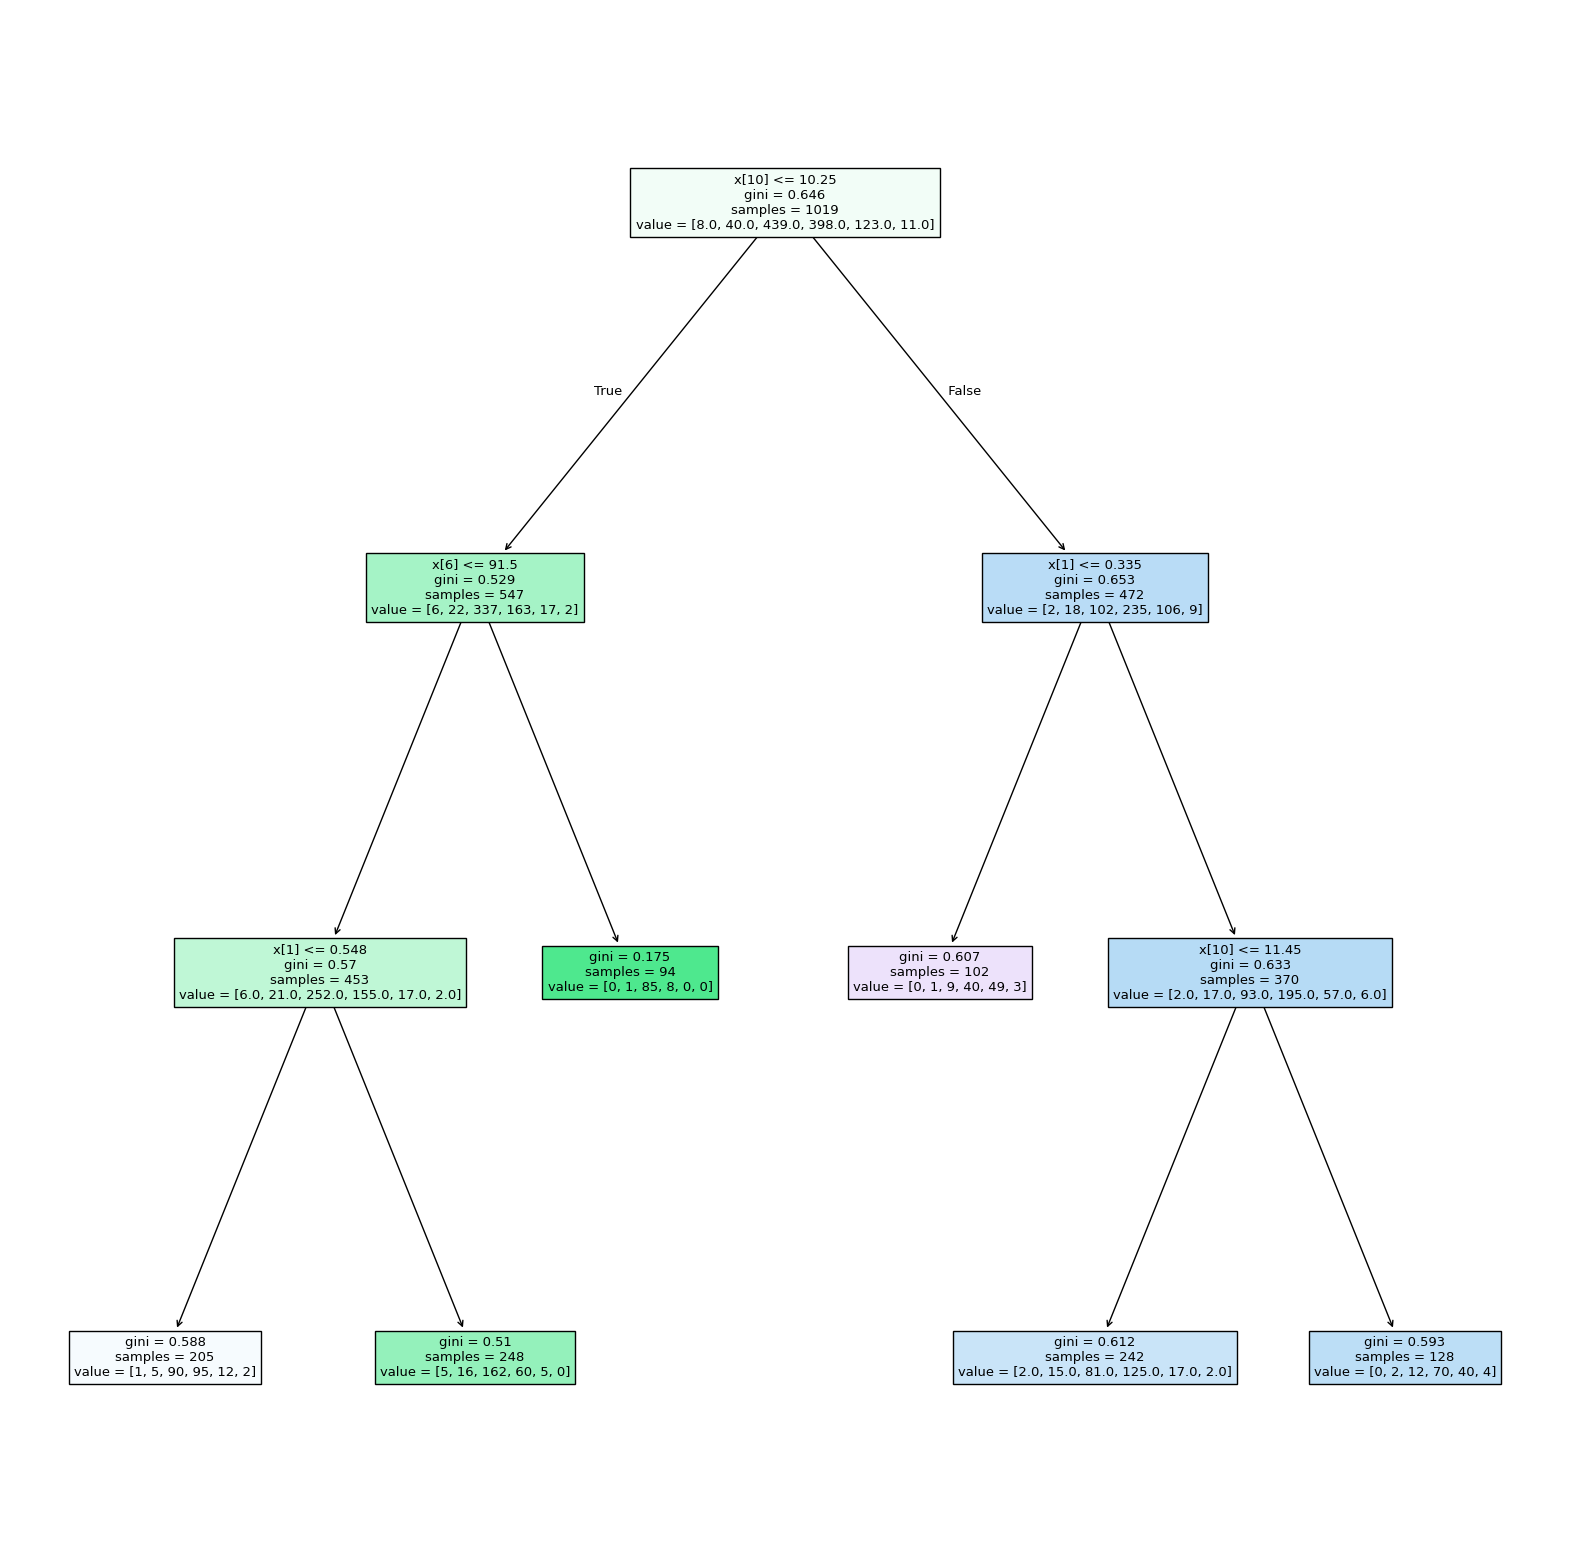

In [ ]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model_ccp,filled=True)

In [ ]:
dt_model_ccp.score(x_train,y_train)

0.5750736015701668

In [ ]:
dt_model_ccp.score(x_test,y_test)

0.5411764705882353

In [ ]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [ ]:
grid_pram = {"criterion":['gini','entropy'],
             "splitter":['best','random'],
             "max_depth" : range(3,20,1),
             "min_samples_split":range(2,5 ,1),
             "min_samples_leaf":range(1,10,1),}


In [ ]:

grid_ccp = GridSearchCV(estimator=dt_model_ccp,param_grid=grid_pram , cv= 10 , n_jobs=-1)

In [ ]:
grid_ccp.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(ccp_alpha=0.009, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 20),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 5),
                         'splitter': ['best', 'random']})

In [ ]:
grid_ccp.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'splitter': 'best'}

In [ ]:
dt_cpp_new = DecisionTreeClassifier(criterion='entropy' , max_depth=8 ,min_samples_leaf=6 , min_samples_split=2 , splitter='best',ccp_alpha=0.009)

In [ ]:
dt_cpp_new.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.009, criterion='entropy', max_depth=8,
                       min_samples_leaf=6)

In [ ]:
dt_cpp_new.score(x_train,y_train)

0.6427870461236507

In [ ]:
dt_cpp_new.score(x_test,y_test)

0.5911764705882353

In [ ]:
prediction_train = dt_cpp_new.predict(x_train)
prediction_test = dt_cpp_new.predict(x_test)

In [ ]:
confusion_matrix(y_train,prediction_train)

array([[  0,   2,   6,   0,   0,   0],
       [  0,   7,  29,   4,   0,   0],
       [  0,   4, 364,  61,  10,   0],
       [  0,   2, 128, 208,  60,   0],
       [  0,   0,   6,  41,  76,   0],
       [  0,   0,   0,   4,   7,   0]])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report_test = classification_report(y_test, prediction_test)
print(report_test)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.20      0.08      0.11        13
           5       0.61      0.75      0.67       138
           6       0.62      0.52      0.57       137
           7       0.49      0.59      0.54        44
           8       0.00      0.00      0.00         6

    accuracy                           0.59       340
   macro avg       0.32      0.32      0.31       340
weighted avg       0.57      0.59      0.57       340



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
report_train = classification_report(y_train, prediction_train)
print(report_train)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.47      0.17      0.25        40
           5       0.68      0.83      0.75       439
           6       0.65      0.52      0.58       398
           7       0.50      0.62      0.55       123
           8       0.00      0.00      0.00        11

    accuracy                           0.64      1019
   macro avg       0.38      0.36      0.36      1019
weighted avg       0.63      0.64      0.63      1019



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
prediction_train_rf = rf_model.predict(x_train)
prediction_test_rf = rf_model.predict(x_test)

In [ ]:
report_test_rf = classification_report(y_test, prediction_test_rf)
print(report_test_rf)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        13
           5       0.67      0.71      0.69       138
           6       0.53      0.64      0.58       137
           7       0.52      0.32      0.39        44
           8       0.00      0.00      0.00         6

    accuracy                           0.59       340
   macro avg       0.29      0.28      0.28       340
weighted avg       0.55      0.59      0.56       340



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
report_train_rf = classification_report(y_train, prediction_train_rf)
print(report_train_rf)

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00       439
           6       1.00      1.00      1.00       398
           7       1.00      1.00      1.00       123
           8       1.00      1.00      1.00        11

    accuracy                           1.00      1019
   macro avg       1.00      1.00      1.00      1019
weighted avg       1.00      1.00      1.00      1019



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           n_jobs=-1,
                           verbose=2)

In [ ]:
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
rf_model_new = RandomForestClassifier(max_depth= 10, min_samples_leaf= 4, min_samples_split= 2, n_estimators= 50, random_state=42)

rf_model_new.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=50,
                       random_state=42)

In [ ]:
# Evaluate on test set
y_pred = rf_model_new.predict(x_test)
print("Test Set Accuracy:", rf_model_new.score(x_test, y_test))

Test Set Accuracy: 0.6029411764705882


In [ ]:
# Evaluate on test set
y_pred = rf_model_new.predict(x_train)
print("Test Set Accuracy:", rf_model_new.score(x_train, y_train))

Test Set Accuracy: 0.831207065750736


In [1]:
# Assuming rf_model_new is your trained model from the previous code
import pandas as pd # Import pandas here to make the cell self-contained

# Create input fields for each feature
fixed_acidity = 0.0  #@param {type:"number"}
volatile_acidity = 0.0  #@param {type:"number"}
citric_acid = 0.0  #@param {type:"number"}
residual_sugar = 0.0  #@param {type:"number"}
chlorides = 0.0  #@param {type:"number"}
free_sulfur_dioxide = 0.0  #@param {type:"number"}
total_sulfur_dioxide = 0.0  #@param {type:"number"}
density = 0.0  #@param {type:"number"}
pH = 0.0  #@param {type:"number"}
sulphates = 0.0  #@param {type:"number"}
alcohol = 0.0  #@param {type:"number"}

# Create a button to trigger prediction
predict_button = False  #@param {type:"boolean"}

if predict_button:
  # Create a DataFrame with the input values
  input_data = pd.DataFrame([[fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol]],
                             columns=x_train.columns) # Use columns from training data

  # Predict the quality
  predicted_quality = rf_model_new.predict(input_data)

  print(f"Predicted Beer Quality: {predicted_quality[0]}")
  # Note: The output will appear below the code cell after clicking the button.